In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
train_df=pd.read_excel("/content/China Exchange Rate 1992-2019.xlsx")
train_df

,Date,Exchange_Rate,Interest Rate,FDI in % of GDP,Export,CPI
0,1992-01-01,5.4618,0.415635,2.613162,5.522475e+09,5.5
1,1992-02-01,5.4776,0.415635,2.613162,6.523120e+09,5.3
2,1992-03-01,5.4871,0.415635,2.613162,6.132661e+09,5.3
3,1992-04-01,5.5098,0.415635,2.613162,6.594309e+09,7.1
4,1992-05-01,5.5182,0.415635,2.613162,6.723671e+09,4.7
...,...,...,...,...,...,...
330,2019-07-01,6.8775,3.024385,1.310719,2.137597e+11,2.8
331,2019-08-01,7.0629,3.024385,1.310719,2.061549e+11,2.8
332,2019-09-01,7.1137,3.024385,1.310719,2.067389e+11,3.0
333,2019-10-01,7.0961,3.024385,1.310719,2.092869e+11,3.8


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             335 non-null    datetime64[ns]
 1   Exchange_Rate    335 non-null    float64       
 2   Interest Rate    335 non-null    float64       
 3   FDI in % of GDP  335 non-null    float64       
 4   Export           335 non-null    float64       
 5   CPI              335 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 15.8 KB


Correlation

(5.5, -0.5)

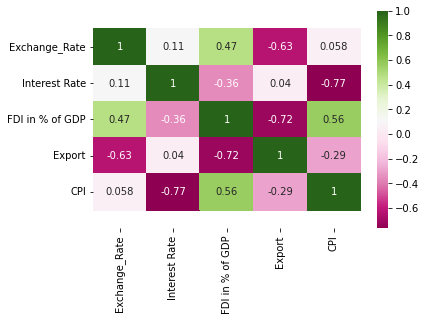

In [ ]:
correlation=train_df.corr()
ax=sn.heatmap(correlation,annot=True,cmap="PiYG")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

1. Logically, exchange rate is inversely correlated with exports which says if exports is more then the currency will appreciate.
2. CPI and Exchange rate is are somewhat positively correlated and it is logical as well.

# Analysis

Inflation

Text(0, 0.5, 'CPI')

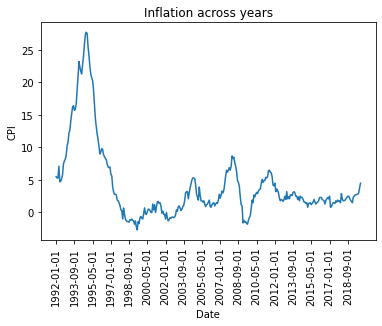

In [ ]:
plt.plot(train_df['Date'],train_df['CPI'])
plt.title('Inflation across years')
plt.xticks(train_df['Date'][::20],  rotation='vertical')
plt.xlabel('Date')
plt.ylabel('CPI')

Exchange Rate

Text(0, 0.5, 'Exchange_Rate')

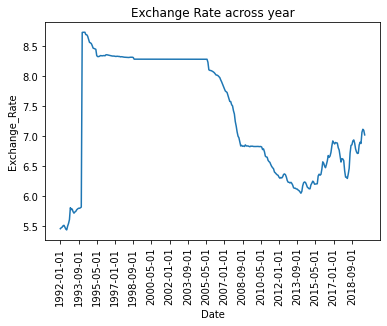

In [ ]:
plt.plot(train_df['Date'],train_df['Exchange_Rate'])
plt.title('Exchange Rate across year')
plt.xticks(train_df['Date'][::20],  rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Exchange_Rate')

FDI as % of GDP

Text(0, 0.5, 'FDI in % of GDP')

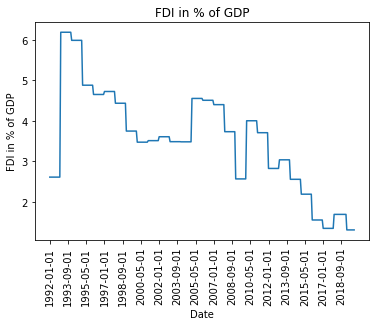

In [ ]:
plt.plot(train_df['Date'],train_df['FDI in % of GDP'])
plt.title('FDI in % of GDP')
plt.xticks(train_df['Date'][::20],  rotation='vertical')
plt.xlabel('Date')
plt.ylabel('FDI in % of GDP')

Export

Text(0, 0.5, 'Export')

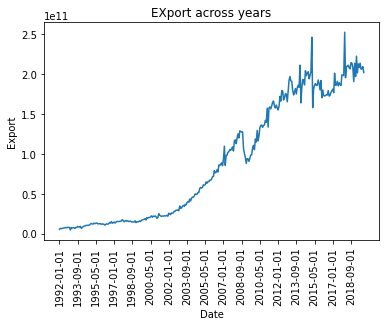

In [ ]:
plt.plot(train_df['Date'],train_df['Export'])
plt.title('EXport across years')
plt.xticks(train_df['Date'][::20],  rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Export')

Interest Rate

Text(0, 0.5, 'Interest Rate')

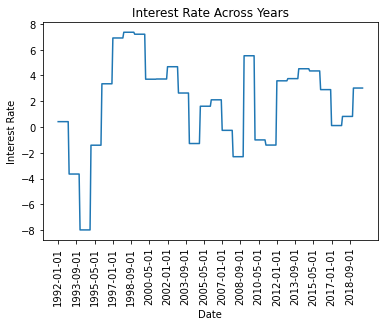

In [ ]:
plt.plot(train_df['Date'],train_df['Interest Rate'])
plt.title('Interest Rate Across Years')
plt.xticks(train_df['Date'][::20],  rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Interest Rate')

# Regression Model

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x=train_df[['Export']]

In [ ]:
y=train_df['Exchange_Rate']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 8.07404677e+00, -8.15230515e-12])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Exchange_Rate   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     221.0
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.07e-38
Time:                        13:44:10   Log-Likelihood:                -378.74
No. Observations:                 335   AIC:                             761.5
Df Residuals:                     333   BIC:                             769.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0740      0.064    125.877      0.000       7.948       8.200
Export     -8.152e-12   5.48e-13    -14.866      0.000   -9.23e-12   -7.07e-12
==============================================================================
Omnibus:                      155.159   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.032
Skew:                          -2.151   Prob(JB):                    5.94e-115
Kurtosis:                       7.379   Cond. No.                     1.83e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient is is negative which is logical and it is also statistically significant. 

In [ ]:
x=train_df[['Export','CPI']]

In [ ]:
y=train_df['Exchange_Rate']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 8.21170663e+00, -8.65531580e-12, -2.23884036e-02])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Exchange_Rate   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     118.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.86e-39
Time:                        13:44:10   Log-Likelihood:                -374.02
No. Observations:                 335   AIC:                             754.0
Df Residuals:                     332   BIC:                             765.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2117      0.077    105.962      0.000       8.059       8.364
Export     -8.655e-12   5.66e-13    -15.304      0.000   -9.77e-12   -7.54e-12
CPI           -0.0224      0.007     -3.083      0.002      -0.037      -0.008
==============================================================================
Omnibus:                      139.450   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.051
Skew:                          -1.938   Prob(JB):                     3.39e-95
Kurtosis:                       7.018   Cond. No.                     2.24e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Both coefficients are statistically significant

In [ ]:
x=train_df[['Export','CPI','FDI in % of GDP']]

In [ ]:
y=train_df['Exchange_Rate']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 7.61392913e+00, -7.18270273e-12, -3.43959357e-02,  1.45597557e-01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Exchange_Rate   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     82.42
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           7.59e-40
Time:                        13:44:10   Log-Likelihood:                -370.55
No. Observations:                 335   AIC:                             749.1
Df Residuals:                     331   BIC:                             764.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.6139      0.240     31.729      0.000       7.142       8.086
Export          -7.183e-12   7.92e-13     -9.064      0.000   -8.74e-12   -5.62e-12
CPI                -0.0344      0.009     -4.035      0.000      -0.051      -0.018
FDI in % of GDP     0.1456      0.055      2.629      0.009       0.037       0.255
==============================================================================
Omnibus:                      119.824   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.441
Skew:                          -1.731   Prob(JB):                     2.35e-68
Kurtosis:                       6.213   Cond. No.                     7.15e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['Export','CPI','FDI in % of GDP','Interest Rate']][:-30]

In [ ]:
x.shape

(305, 4)

In [ ]:
test_x=train_df[['Export','CPI','FDI in % of GDP','Interest Rate']][-30:]

In [ ]:
test_x.shape

(30, 4)

In [ ]:
y=train_df['Exchange_Rate'][:-30]

In [ ]:
test_y=train_df['Exchange_Rate'][-30:]

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 7.09291971e+00, -7.26909783e-12, -2.94396622e-02,  2.52628572e-01,
        3.23279454e-02])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Exchange_Rate   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     60.49
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           2.03e-37
Time:                        13:44:10   Log-Likelihood:                -339.62
No. Observations:                 305   AIC:                             689.2
Df Residuals:                     300   BIC:                             707.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0929      0.283     25.093      0.000       6.537       7.649
Export          -7.269e-12   8.44e-13     -8.613      0.000   -8.93e-12   -5.61e-12
CPI                -0.0294      0.013     -2.329      0.021      -0.054      -0.005
FDI in % of GDP     0.2526      0.061      4.165      0.000       0.133       0.372
Interest Rate       0.0323      0.020      1.639      0.102      -0.006       0.071
==============================================================================
Omnibus:                      108.207   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.476
Skew:                          -1.702   Prob(JB):                     9.21e-61
Kurtosis:                       6.189   Cond. No.                     7.06e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finding VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [ ]:
vif_data

,feature,VIF
0,Export,1.680034
1,CPI,4.888976
2,FDI in % of GDP,5.700819
3,Interest Rate,2.897942


VIF is below 10 so no multicollinearity

# Evaluation

In [ ]:
y_pred=7.0929+-0.0294*x['CPI']+0.2526*x['FDI in % of GDP']+0.0323*x['Interest Rate']

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, y_pred))

In [ ]:
print('RMSE: ',rms)

RMSE:  1.057265259161642


Random walk Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train=train_df['Exchange_Rate'][:-30]
test=train_df['Exchange_Rate'][-30:]

In [ ]:
model=ARIMA(train,order=(0,1,0))

In [ ]:
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Exchange_Rate   No. Observations:                  304
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 108.345
Method:                           css   S.D. of innovations              0.169
Date:                Mon, 18 Jul 2022   AIC                           -212.689
Time:                        13:44:10   BIC                           -205.255
Sample:                             1   HQIC                          -209.715
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.010      0.482      0.630      -0.014       0.024
==============================================================================
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred

305    6.888979
306    6.893659
307    6.898338
308    6.903017
309    6.907696
310    6.912376
311    6.917055
312    6.921734
313    6.926413
314    6.931093
315    6.935772
316    6.940451
317    6.945131
318    6.949810
319    6.954489
320    6.959168
321    6.963848
322    6.968527
323    6.973206
324    6.977886
325    6.982565
326    6.987244
327    6.991923
328    6.996603
329    7.001282
330    7.005961
331    7.010640
332    7.015320
333    7.019999
334    7.024678
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(test, pred)
rms = sqrt(mean_squared_error(test, pred))

In [ ]:
print('MSE ',mse)
print('RMSE ',rms)

MSE  0.09400231698435557
RMSE  0.30659797289668367


#Time Series Analysis

In [ ]:

import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from  statsmodels.tsa.arima_model import ARMA
from  statsmodels.tsa.arima_model import ARIMA

from  scipy.stats.distributions import chi2


In [ ]:
df=pd.read_excel("/content/China Exchange Rate 1992-2019.xlsx")

In [ ]:
df.isna().sum()

Date               0
Exchange_Rate      0
Interest Rate      0
FDI in % of GDP    0
Export             0
CPI                0
dtype: int64

In [ ]:
df.describe()

,Exchange_Rate,Interest Rate,FDI in % of GDP,Export,CPI
count,335.000000,335.000000,335.000000,3.350000e+02,335.000000
mean,7.341634,1.890291,3.537627,8.984118e+10,4.130209
std,0.968159,3.457074,1.243850,7.500741e+10,5.841390
min,5.441700,-7.989744,1.310719,4.610344e+09,-2.680000
25%,6.469850,-0.630986,2.613162,1.593954e+10,1.200000
50%,7.368200,2.638147,3.609100,6.823275e+10,2.200000
75%,8.277450,4.054230,4.472078,1.724374e+11,5.150000
max,8.725100,7.356478,6.186882,2.524567e+11,27.700000


In [ ]:
#Converting date into date time format
df.Date=pd.to_datetime(df.Date,dayfirst=True)

In [ ]:
#setting date as index
df.set_index("Date",inplace=True)
df

,Exchange_Rate,Interest Rate,FDI in % of GDP,Export,CPI
Date,,,,,
1992-01-01,5.4618,0.415635,2.613162,5.522475e+09,5.5
1992-02-01,5.4776,0.415635,2.613162,6.523120e+09,5.3
1992-03-01,5.4871,0.415635,2.613162,6.132661e+09,5.3
1992-04-01,5.5098,0.415635,2.613162,6.594309e+09,7.1
1992-05-01,5.5182,0.415635,2.613162,6.723671e+09,4.7
...,...,...,...,...,...
2019-07-01,6.8775,3.024385,1.310719,2.137597e+11,2.8
2019-08-01,7.0629,3.024385,1.310719,2.061549e+11,2.8
2019-09-01,7.1137,3.024385,1.310719,2.067389e+11,3.0


In [ ]:
#As for time series we only need exchange rate column 
del df["Interest Rate"],df["FDI in % of GDP"],df["Export"],df["CPI"]

In [ ]:
df

,Exchange_Rate
Date,
1992-01-01,5.4618
1992-02-01,5.4776
1992-03-01,5.4871
1992-04-01,5.5098
1992-05-01,5.5182
...,...
2019-07-01,6.8775
2019-08-01,7.0629
2019-09-01,7.1137


In [ ]:
#Splitting the Data
size=int(len(df)*.8)

In [ ]:
df_train=df.iloc[:size]
df_test=df.iloc[size:]

In [ ]:
df_train.tail()

,Exchange_Rate
Date,
2013-12-01,6.0738
2014-01-01,6.0509
2014-02-01,6.0816
2014-03-01,6.1729
2014-04-01,6.2246


In [ ]:
df_test.head()

,Exchange_Rate
Date,
2014-05-01,6.2380
2014-06-01,6.2306
2014-07-01,6.1984
2014-08-01,6.1541
2014-09-01,6.1382


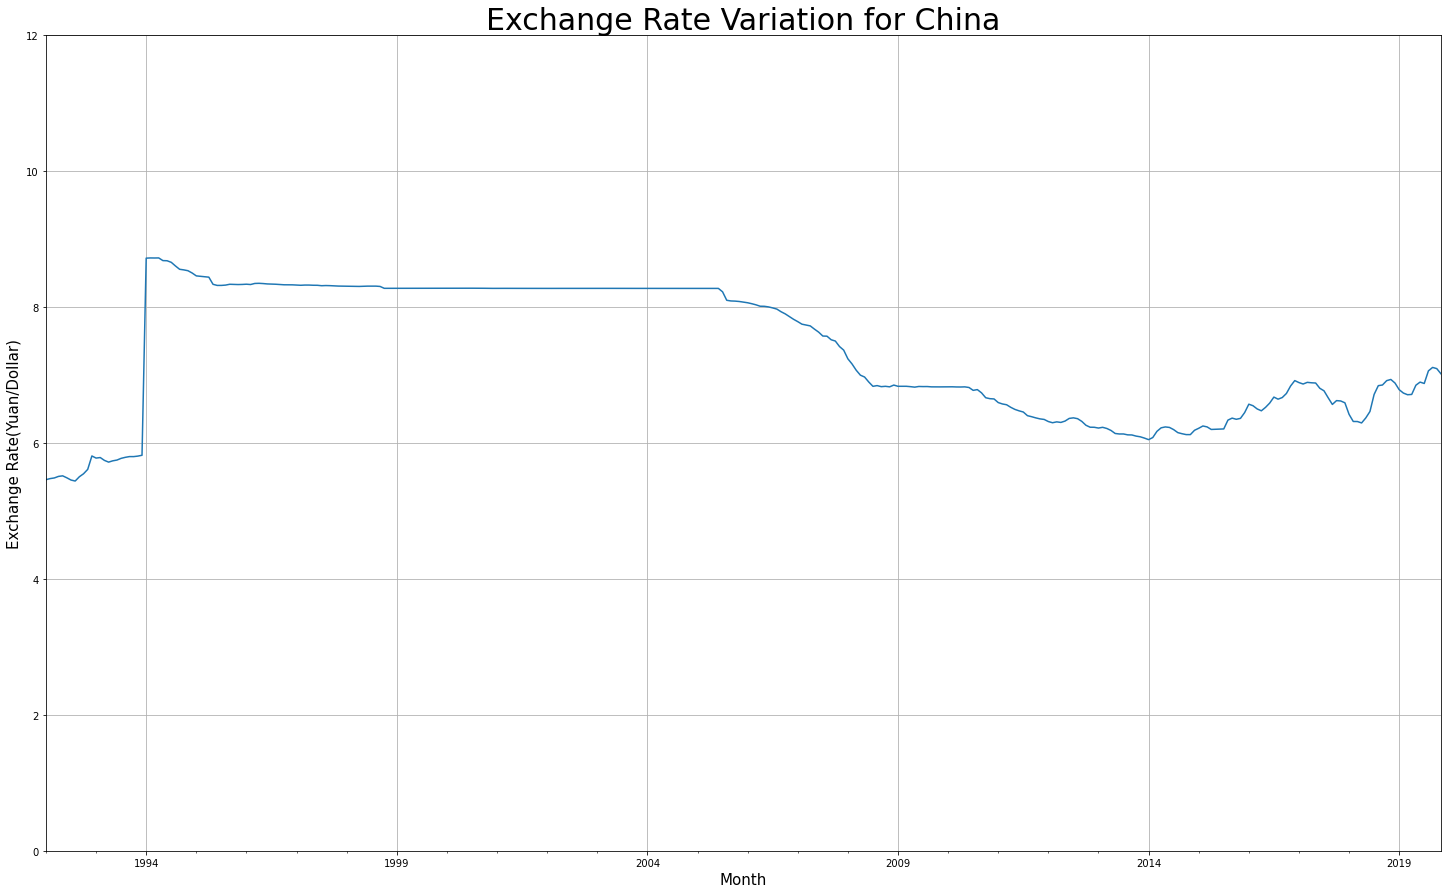

In [ ]:
#Plotting the Exchange Rate 
df.Exchange_Rate.plot(figsize=(25,15))
plt.title("Exchange Rate Variation for China",size=30)
plt.xlabel("Month",size=15)
plt.ylabel("Exchange Rate(Yuan/Dollar)",size=15)
plt.ylim(0,12)
plt.grid()	
plt.show()

In [ ]:
#Checking where  dataseries is stationary or not 
sts.adfuller(df.Exchange_Rate)
 #So the timeseries is not stationary 

(-2.149049800276612,
 0.2252539809676219,
 0,
 334,
 {'1%': -3.450081345901191,
  '10%': -2.571401168202517,
  '5%': -2.870232621465807},
 -232.8731579846401)

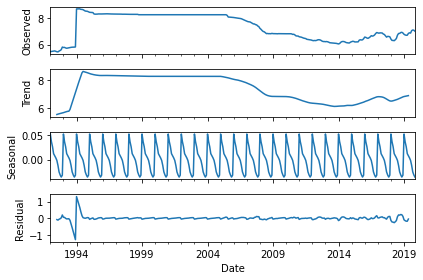

In [ ]:
#Lets check for seasonality of series
df_dec=seasonal_decompose(df.Exchange_Rate,model="additive")
df_dec.plot()

plt.show()

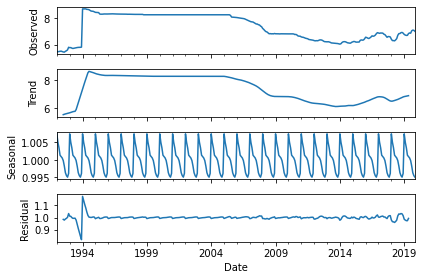

In [ ]:
#Lets check for seasonality of series
df_dec=seasonal_decompose(df.Exchange_Rate,model="multiplicative")
df_dec.plot()

plt.show()

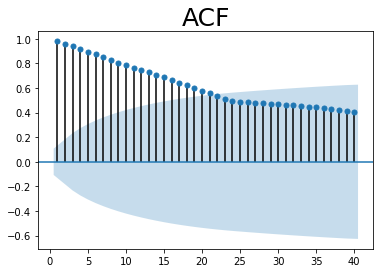

In [ ]:
#Finding Autocorrelation by using ACF and PACF
sgt.plot_acf(df.Exchange_Rate,lags=40,zero=False)
plt.title("ACF",size=25)
plt.show()  #So it is showing that there is significant autocoorelation upto 20 lags

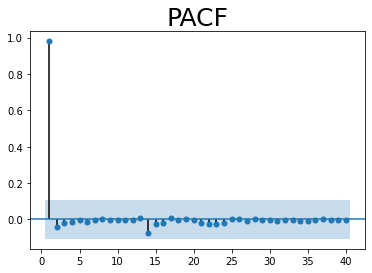

In [ ]:
sgt.plot_pacf(df.Exchange_Rate,lags=40,zero=False,method=("ols"))
plt.title("PACF",size=25)
plt.show()  #so only upto lag 1 is significant means directly only one lag is affecting 

In [ ]:
!pip install statsmodels==0.10.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#AR(1) model

In [ ]:
model_ar1=ARMA(df_train.Exchange_Rate,order=(1,0))
res_ar1=model_ar1.fit()
res_ar1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(1, 0)   Log Likelihood                  78.451
Method:                       css-mle   S.D. of innovations              0.179
Date:                Mon, 18 Jul 2022   AIC                           -150.902
Time:                        13:44:22   BIC                           -140.129
Sample:                    01-01-1992   HQIC                          -146.575
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.8898      0.777      8.864      0.000       5.366       8.413
ar.L1.Exchange_Rate     0.9880      0.009    111.282      0.000       0.971       1.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0122           +0.0000j            1.0122            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar2=ARMA(df_train.Exchange_Rate,order=(2,0))
res_ar2=model_ar2.fit()
res_ar2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(2, 0)   Log Likelihood                  78.532
Method:                       css-mle   S.D. of innovations              0.179
Date:                Mon, 18 Jul 2022   AIC                           -149.063
Time:                        13:44:22   BIC                           -134.699
Sample:                    01-01-1992   HQIC                          -143.294
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.9128      0.762      9.077      0.000       5.420       8.405
ar.L1.Exchange_Rate     1.0122      0.061     16.618      0.000       0.893       1.132
ar.L2.Exchange_Rate    -0.0246      0.061     -0.402      0.688      -0.145       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0129           +0.0000j            1.0129            0.0000
AR.2           40.1210           +0.0000j           40.1210            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar3=ARMA(df_train.Exchange_Rate,order=(3,0))
res_ar3=model_ar3.fit()
res_ar3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(3, 0)   Log Likelihood                  78.579
Method:                       css-mle   S.D. of innovations              0.179
Date:                Mon, 18 Jul 2022   AIC                           -147.158
Time:                        13:44:22   BIC                           -129.203
Sample:                    01-01-1992   HQIC                          -139.947
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.9311      0.750      9.246      0.000       5.462       8.400
ar.L1.Exchange_Rate     1.0118      0.061     16.610      0.000       0.892       1.131
ar.L2.Exchange_Rate    -0.0056      0.087     -0.065      0.948      -0.176       0.165
ar.L3.Exchange_Rate    -0.0189      0.061     -0.308      0.758      -0.139       0.101
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0135           +0.0000j            1.0135            0.0000
AR.2            6.6060           +0.0000j            6.6060            0.0000
AR.3           -7.9184           +0.0000j            7.9184            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar8=ARMA(df_train.Exchange_Rate,order=(8,0))
res_ar8=model_ar8.fit()
res_ar8.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(8, 0)   Log Likelihood                  78.679
Method:                       css-mle   S.D. of innovations              0.179
Date:                Mon, 18 Jul 2022   AIC                           -137.358
Time:                        13:44:24   BIC                           -101.448
Sample:                    01-01-1992   HQIC                          -122.935
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.9819      0.722      9.673      0.000       5.567       8.397
ar.L1.Exchange_Rate     1.0112      0.061     16.599      0.000       0.892       1.131
ar.L2.Exchange_Rate    -0.0057      0.087     -0.066      0.948      -0.176       0.164
ar.L3.Exchange_Rate    -0.0043      0.087     -0.050      0.960      -0.174       0.166
ar.L4.Exchange_Rate    -0.0117      0.086     -0.135      0.893      -0.181       0.158
ar.L5.Exchange_Rate     0.0141      0.086      0.163      0.871      -0.155       0.183
ar.L6.Exchange_Rate    -0.0026      0.086     -0.030      0.976      -0.171       0.166
ar.L7.Exchange_Rate    -0.0135      0.086     -0.157      0.876      -0.182       0.155
ar.L8.Exchange_Rate    -0.0012      0.061     -0.019      0.985      -0.120       0.118
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0155           -0.0000j            1.0155           -0.0000
AR.2            1.7473           -0.0000j            1.7473           -0.0000
AR.3            0.9029           -1.7268j            1.9486           -0.1733
AR.4            0.9029           +1.7268j            1.9486            0.1733
AR.5           -1.2065           -1.7739j            2.1453           -0.3451
AR.6           -1.2065           +1.7739j            2.1453            0.3451
AR.7           -2.4551           -0.0000j            2.4551           -0.5000
AR.8          -11.1326           -0.0000j           11.1326           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pred =res_ar1.predict(start=len(df_train),end=(len(df)-1),dynamic=False)
forecast = pd.DataFrame(pred,index = df_test.index,columns=['Prediction'])
forecast

,Prediction
Date,
2014-05-01,6.232589
2014-06-01,6.240482
2014-07-01,6.248280
2014-08-01,6.255984
2014-09-01,6.263596
...,...
2019-07-01,6.579074
2019-08-01,6.582806
2019-09-01,6.586493


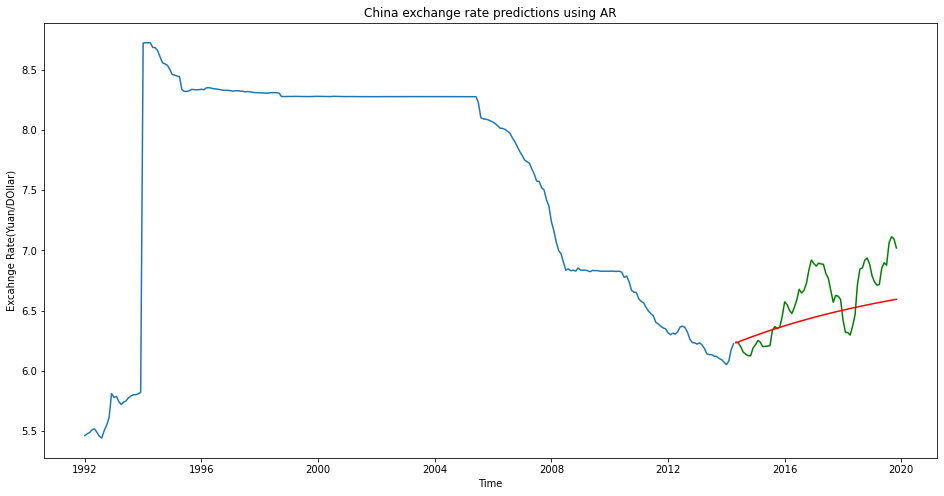

In [ ]:
plt.figure(figsize=(16,8))
plt.title('China exchange rate predictions using AR')
plt.ylabel('Excahnge Rate(Yuan/DOllar)')
plt.xlabel('Time')
plt.plot(df_train.Exchange_Rate)
plt.plot(df_test.Exchange_Rate,color='g')
plt.plot(forecast['Prediction'],color='r')

#Moving Average

In [ ]:
model_MA1=ARMA(df_train.Exchange_Rate,order=(0,1))
res_MA1=model_MA1.fit()
res_MA1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(0, 1)   Log Likelihood                -223.725
Method:                       css-mle   S.D. of innovations              0.556
Date:                Mon, 18 Jul 2022   AIC                            453.449
Time:                        13:44:25   BIC                            464.222
Sample:                    01-01-1992   HQIC                           457.776
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.5266      0.064    117.435      0.000       7.401       7.652
ma.L1.Exchange_Rate     0.8906      0.021     41.551      0.000       0.849       0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1228           +0.0000j            1.1228            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_MA3=ARMA(df_train.Exchange_Rate,order=(0,3))
res_MA3=model_MA3.fit()
res_MA3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(0, 3)   Log Likelihood                 -69.985
Method:                       css-mle   S.D. of innovations              0.313
Date:                Mon, 18 Jul 2022   AIC                            149.971
Time:                        13:44:25   BIC                            167.926
Sample:                    01-01-1992   HQIC                           157.182
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.5154      0.079     94.541      0.000       7.360       7.671
ma.L1.Exchange_Rate     1.4087      0.066     21.406      0.000       1.280       1.538
ma.L2.Exchange_Rate     1.2027      0.060     19.996      0.000       1.085       1.321
ma.L3.Exchange_Rate     0.5715      0.044     13.055      0.000       0.486       0.657
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2519           -0.0000j            1.2519           -0.5000
MA.2           -0.4262           -1.1027j            1.1822           -0.3087
MA.3           -0.4262           +1.1027j            1.1822            0.3087
-----------------------------------------------------------------------------
"""

In [ ]:
model_MA5=ARMA(df_train.Exchange_Rate,order=(0,5))
res_MA5=model_MA5.fit()
res_MA5.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(0, 5)   Log Likelihood                  -8.398
Method:                       css-mle   S.D. of innovations              0.248
Date:                Mon, 18 Jul 2022   AIC                             30.795
Time:                        13:44:26   BIC                             55.932
Sample:                    01-01-1992   HQIC                            40.892
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.5061      0.095     78.798      0.000       7.319       7.693
ma.L1.Exchange_Rate     1.3514      0.071     18.901      0.000       1.211       1.491
ma.L2.Exchange_Rate     1.4502      0.106     13.734      0.000       1.243       1.657
ma.L3.Exchange_Rate     1.2659      0.086     14.801      0.000       1.098       1.434
ma.L4.Exchange_Rate     0.8609      0.068     12.717      0.000       0.728       0.994
ma.L5.Exchange_Rate     0.4018      0.058      6.977      0.000       0.289       0.515
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.2776           -1.1175j            1.1515           -0.2112
MA.2            0.2776           +1.1175j            1.1515            0.2112
MA.3           -1.2389           -0.0000j            1.2389           -0.5000
MA.4           -0.7295           -0.9915j            1.2310           -0.3510
MA.5           -0.7295           +0.9915j            1.2310            0.3510
-----------------------------------------------------------------------------
"""

In [ ]:
model_MA7=ARMA(df_train.Exchange_Rate,order=(0,7))
res_MA7=model_MA7.fit()
res_MA7.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                     ARMA(0, 7)   Log Likelihood                  22.629
Method:                       css-mle   S.D. of innovations              0.221
Date:                Mon, 18 Jul 2022   AIC                            -27.259
Time:                        13:44:27   BIC                              5.060
Sample:                    01-01-1992   HQIC                           -14.278
                         - 04-01-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.4982      0.113     66.443      0.000       7.277       7.719
ma.L1.Exchange_Rate     1.2943      0.063     20.493      0.000       1.171       1.418
ma.L2.Exchange_Rate     1.4669      0.098     14.956      0.000       1.275       1.659
ma.L3.Exchange_Rate     1.4792      0.115     12.831      0.000       1.253       1.705
ma.L4.Exchange_Rate     1.2948      0.107     12.132      0.000       1.086       1.504
ma.L5.Exchange_Rate     0.9966      0.090     11.087      0.000       0.820       1.173
ma.L6.Exchange_Rate     0.6351      0.075      8.525      0.000       0.489       0.781
ma.L7.Exchange_Rate     0.2802      0.054      5.215      0.000       0.175       0.386
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.5860           -0.9628j            1.1271           -0.1630
MA.2            0.5860           +0.9628j            1.1271            0.1630
MA.3           -0.1534           -1.1883j            1.1982           -0.2704
MA.4           -0.1534           +1.1883j            1.1982            0.2704
MA.5           -0.9427           -0.8253j            1.2529           -0.3855
MA.6           -0.9427           +0.8253j            1.2529            0.3855
MA.7           -1.2466           -0.0000j            1.2466           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_MA13=ARMA(df_train.Exchange_Rate,order=(0,13))
res_MA13=model_MA13.fit()
res_MA13.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  268
Model:                    ARMA(0, 13)   Log Likelihood                  56.839
Method:                       css-mle   S.D. of innovations              0.194
Date:                Mon, 18 Jul 2022   AIC                            -83.679
Time:                        13:44:50   BIC                            -29.814
Sample:                    01-01-1992   HQIC                           -62.044
                         - 04-01-2014                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.4695      0.158     47.408      0.000       7.161       7.778
ma.L1.Exchange_Rate      1.1547      0.062     18.510      0.000       1.032       1.277
ma.L2.Exchange_Rate      1.2836      0.097     13.284      0.000       1.094       1.473
ma.L3.Exchange_Rate      1.3709      0.127     10.753      0.000       1.121       1.621
ma.L4.Exchange_Rate      1.3984      0.153      9.127      0.000       1.098       1.699
ma.L5.Exchange_Rate      1.3861      0.169      8.199      0.000       1.055       1.717
ma.L6.Exchange_Rate      1.3241      0.172      7.717      0.000       0.988       1.660
ma.L7.Exchange_Rate      1.2029      0.160      7.514      0.000       0.889       1.517
ma.L8.Exchange_Rate      1.0467      0.143      7.326      0.000       0.767       1.327
ma.L9.Exchange_Rate      0.8665      0.128      6.774      0.000       0.616       1.117
ma.L10.Exchange_Rate     0.6596      0.118      5.601      0.000       0.429       0.890
ma.L11.Exchange_Rate     0.4534      0.106      4.294      0.000       0.246       0.660
ma.L12.Exchange_Rate     0.2374      0.086      2.766      0.006       0.069       0.406
ma.L13.Exchange_Rate     0.1223      0.059      2.064      0.040       0.006       0.238
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1             0.8947           -0.6161j            1.0863           -0.0960
MA.2             0.8947           +0.6161j            1.0863            0.0960
MA.3            -1.1576           -0.0000j            1.1576           -0.5000
MA.4            -1.0464           -0.5192j            1.1681           -0.4267
MA.5            -1.0464           +0.5192j            1.1681            0.4267
MA.6            -0.7390           -0.9461j            1.2005           -0.3555
MA.7            -0.7390           +0.9461j            1.2005            0.3555
MA.8             0.6073           -0.9907j            1.1621           -0.1625
MA.9             0.6073           +0.9907j            1.1621            0.1625
MA.10           -0.2853           -1.1886j            1.2224           -0.2875
MA.11           -0.2853           +1.1886j            1.2224            0.2875
MA.12            0.1769           -1.2154j            1.2282           -0.2270
MA.13            0.1769           +1.2154j            1.2282            0.2270
------------------------------------------------------------------------------
"""

In [ ]:
pred =res_MA13.predict(start=len(df_train),end=(len(df)-1),dynamic=False)
forecast = pd.DataFrame(pred,index = df_test.index,columns=['Prediction'])
forecast

,Prediction
Date,
2014-05-01,6.352423
2014-06-01,6.487874
2014-07-01,6.628966
2014-08-01,6.770622
2014-09-01,6.907831
...,...
2019-07-01,7.469508
2019-08-01,7.469508
2019-09-01,7.469508


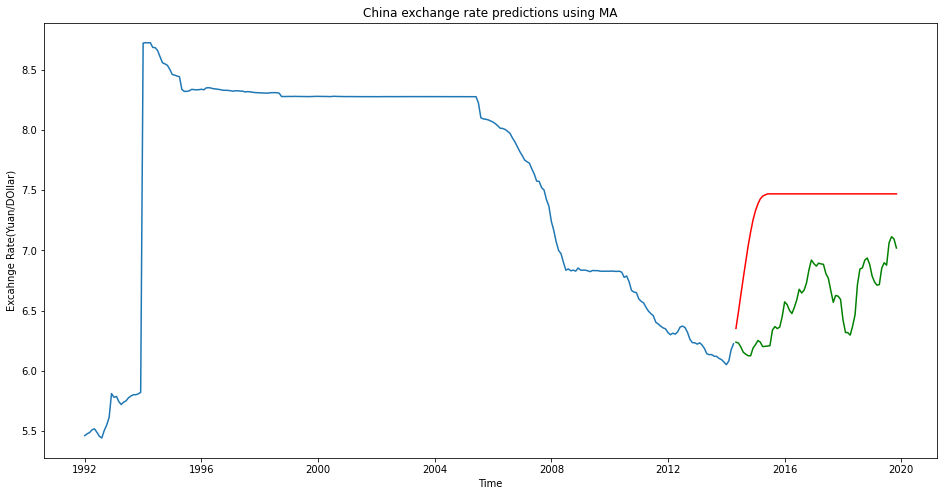

In [ ]:
plt.figure(figsize=(16,8))
plt.title('China exchange rate predictions using MA')
plt.ylabel('Excahnge Rate(Yuan/DOllar)')
plt.xlabel('Time')
plt.plot(df_train.Exchange_Rate)
plt.plot(df_test.Exchange_Rate,color='g')
plt.plot(forecast['Prediction'],color='r')

#ARMA

In [ ]:
model_ARMA1=ARMA(df.Exchange_Rate,order=(1,1))
res_ARMA1=model_ARMA1.fit()
res_ARMA1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood                 129.766
Method:                       css-mle   S.D. of innovations              0.163
Date:                Mon, 18 Jul 2022   AIC                           -251.532
Time:                        13:45:07   BIC                           -236.276
Sample:                    01-01-1992   HQIC                          -245.450
                         - 11-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.0076      0.591     11.848      0.000       5.848       8.167
ar.L1.Exchange_Rate     0.9864      0.009    114.232      0.000       0.970       1.003
ma.L1.Exchange_Rate     0.0409      0.054      0.755      0.451      -0.065       0.147
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0137           +0.0000j            1.0137            0.0000
MA.1          -24.4531           +0.0000j           24.4531            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ARMA2=ARMA(df.Exchange_Rate,order=(2,2))
res_ARMA2=model_ARMA2.fit()
res_ARMA2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  335
Model:                     ARMA(2, 2)   Log Likelihood                 131.932
Method:                       css-mle   S.D. of innovations              0.162
Date:                Mon, 18 Jul 2022   AIC                           -251.865
Time:                        13:45:09   BIC                           -228.980
Sample:                    01-01-1992   HQIC                          -242.741
                         - 11-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2640      0.198     36.694      0.000       6.876       7.652
ar.L1.Exchange_Rate     1.9865      0.009    233.549      0.000       1.970       2.003
ar.L2.Exchange_Rate    -0.9870      0.009   -115.802      0.000      -1.004      -0.970
ma.L1.Exchange_Rate    -0.9748      0.057    -17.190      0.000      -1.086      -0.864
ma.L2.Exchange_Rate    -0.0215      0.055     -0.389      0.698      -0.130       0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0064           -0.0206j            1.0066           -0.0033
AR.2            1.0064           +0.0206j            1.0066            0.0033
MA.1            1.0036           +0.0000j            1.0036            0.0000
MA.2          -46.2448           +0.0000j           46.2448            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ARMA3=ARMA(df.Exchange_Rate,order=(2,1))
res_ARMA3=model_ARMA3.fit()
res_ARMA3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Exchange_Rate   No. Observations:                  335
Model:                     ARMA(2, 1)   Log Likelihood                 131.946
Method:                       css-mle   S.D. of innovations              0.162
Date:                Mon, 18 Jul 2022   AIC                           -253.892
Time:                        13:45:12   BIC                           -234.821
Sample:                    01-01-1992   HQIC                          -246.289
                         - 11-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2765      0.178     40.960      0.000       6.928       7.625
ar.L1.Exchange_Rate     1.9878      0.008    253.746      0.000       1.972       2.003
ar.L2.Exchange_Rate    -0.9883      0.008   -125.768      0.000      -1.004      -0.973
ma.L1.Exchange_Rate    -0.9987      0.008   -123.337      0.000      -1.015      -0.983
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0057           -0.0212j            1.0059           -0.0034
AR.2            1.0057           +0.0212j            1.0059            0.0034
MA.1            1.0013           +0.0000j            1.0013            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pred =res_ARMA3.predict(start=len(df_train),end=(len(df)-1),dynamic=False)
forecast = pd.DataFrame(pred,index = df_test.index,columns=['Prediction'])
forecast

,Prediction
Date,
2014-05-01,6.233023
2014-06-01,6.246778
2014-07-01,6.239910
2014-08-01,6.208464
2014-09-01,6.165039
...,...
2019-07-01,6.918874
2019-08-01,6.898983
2019-09-01,7.082781


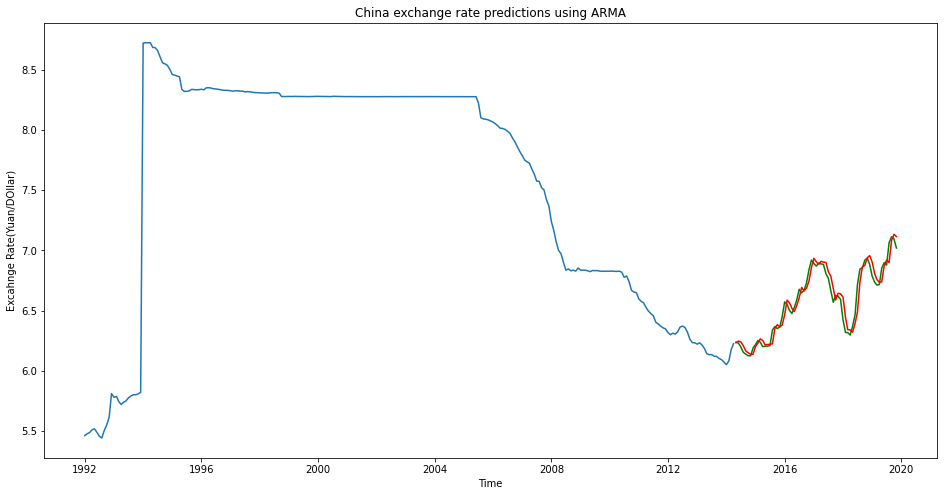

In [ ]:
plt.figure(figsize=(16,8))
plt.title('China exchange rate predictions using ARMA')
plt.ylabel('Excahnge Rate(Yuan/DOllar)')
plt.xlabel('Time')
plt.plot(df_train.Exchange_Rate)
plt.plot(df_test.Exchange_Rate,color='g')
plt.plot(forecast['Prediction'],color='r')

#ARIMA

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(df_train.Exchange_Rate, start_p=1, start_q=1, max_p=1, max_q=1, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-108.570, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=43.264, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-110.205, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-110.582, Time=1.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=45.213, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-119.104, Time=1.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-110.204, Time=0.44 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-117.201, Time=3.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-117.200, Time=5.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-118.684, Time=3.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-118.176, Time=1.26 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-115.198, Time=4.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-121.026, Time=1.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-112.556, Time=0.76 sec
 ARIMA(0,1,0)(1,1,0)[12

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
forecast = model.predict(n_periods=len(df_test.Exchange_Rate))
forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])
forecast


,Prediction
Date,
2014-05-01,6.222949
2014-06-01,6.232105
2014-07-01,6.223075
2014-08-01,6.204850
2014-09-01,6.174760
...,...
2019-07-01,5.646332
2019-08-01,5.629757
2019-09-01,5.608695


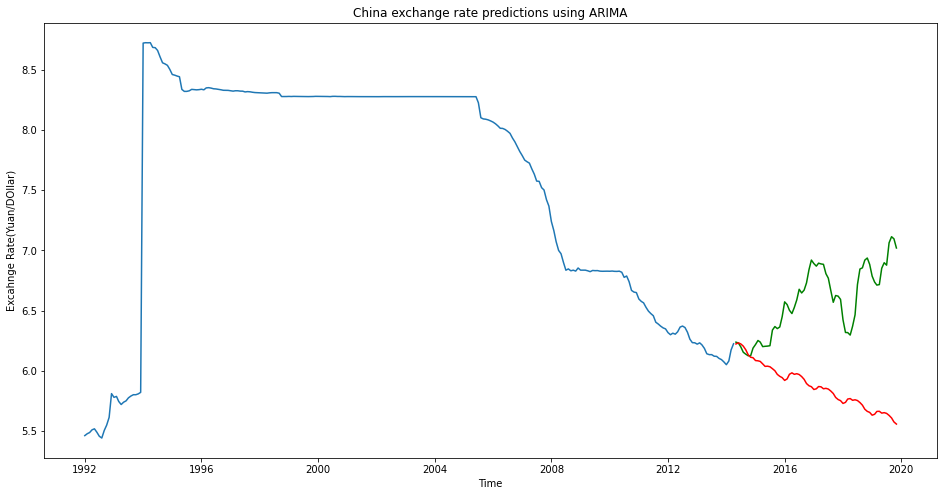

In [ ]:
plt.figure(figsize=(16,8))
plt.title('China exchange rate predictions using ARIMA')
plt.ylabel('Excahnge Rate(Yuan/DOllar)')
plt.xlabel('Time')
plt.plot(df_train.Exchange_Rate)
plt.plot(df_test.Exchange_Rate,color='g')
plt.plot(forecast['Prediction'],color='r')

Facebook Prophet

In [ ]:
#importing prophet
from fbprophet import Prophet

In [ ]:
df_train_new=df_train.copy()

In [ ]:
df_train_new['Date']=df_train_new.index

In [ ]:
train = df_train_new[['Date','Exchange_Rate']][:-30]
valid = df_train_new[['Date','Exchange_Rate']][-30:]

In [ ]:
#preparing data
train = train.rename(columns={'Exchange_Rate': 'y', 'Date': 'ds'})
valid = valid.rename(columns={'Exchange_Rate': 'y', 'Date': 'ds'})


In [ ]:
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(train)

In [ ]:
Exchange_Rate= model.make_future_dataframe(periods=len(valid))
forecast = model.predict(Exchange_Rate)

In [ ]:
forecast_valid = forecast['yhat'][len(train):]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
0.23010605821688948


In [ ]:
forecast_valid

238    6.252391
239    6.183211
240    6.277671
241    6.226516
242    6.200774
243    6.259046
244    6.281488
245    6.262825
246    6.220197
247    6.340361
248    6.313205
249    6.308930
250    6.385373
251    6.422010
252    6.412993
253    6.375019
254    6.494544
255    6.461312
256    6.445546
257    6.505271
258    6.520315
259    6.485340
260    6.417697
261    6.504622
262    6.436749
263    6.385268
264    6.409223
265    6.389488
266    6.321757
267    6.224377
Name: yhat, dtype: float64

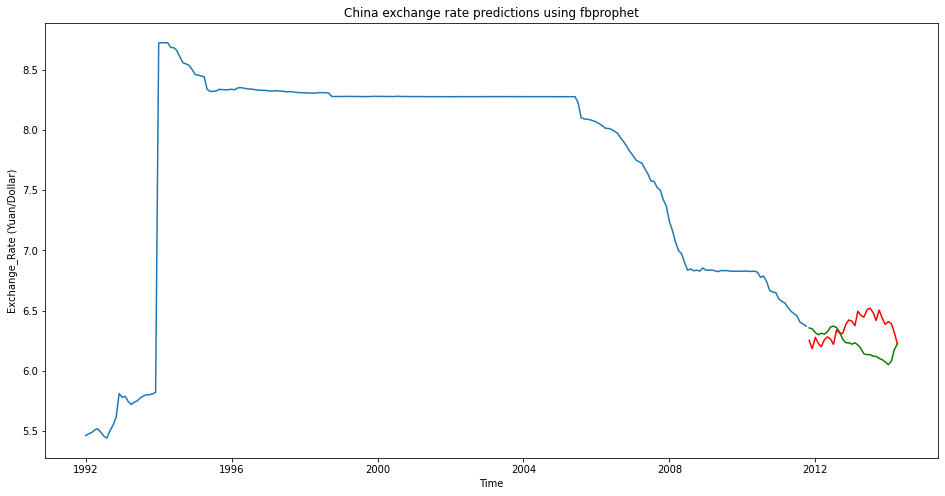

In [ ]:
#plot
plt.figure(figsize=(16,8))
plt.title('China exchange rate predictions using fbprophet')
plt.ylabel('Exchange_Rate (Yuan/Dollar)')
plt.xlabel('Time')

valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = forecast_valid.values)
plt.plot(train['y'])
plt.plot(valid['y'],color='g')
plt.plot(valid['Predictions'],color='r')